<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [4]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    total = np.zeros_like(V[0])  # (n, 1) boyutunda sıfır vektörü oluştur
    for i in range(len(X)):
        total += X[i] @ V[i]     # @ = matris çarpımı operatörü
    return total
    

In [7]:

A1 = np.array([[8, 2], [3, 4]])
A2 = np.array([[0, 1], [1, 0]])
v1 = np.array([[1], [1]])
v2 = np.array([[2], [3]])

result = sum_prod([A1, A2], [v1, v2])
print(result)


[[13]
 [ 9]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [8]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)
    pass

In [10]:
# Basit bir matris
M = np.array([[0.5, 0.7],
              [0.8, 0.9]])

print(binarize(M, threshold=0.5))


# Test 2: Eşik değeri 0.8
print(binarize(M, threshold=0.8))



[[0 1]
 [1 1]]
[[0 0]
 [0 1]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [11]:
def unique_rows(mat):
    result = []
    for row in M:
        uniques = np.unique(row)
        result.append(uniques)
    return result
    

def unique_columns(mat):
    result = []
    for col in M.T:
        uniques = np.unique(col)
        result.append(uniques)
    return result
    

In [ ]:
M = np.array([
    [1, 2, 2, 3],
    [4, 9, 5, 6],
    [7, 8, 3, 7]
])

print("По строкам / Satırlarda :")
print(unique_rows(M))

print("По столбцам / Sütunlarda :")
print(unique_columns(M))



По строкам 
[array([1, 2, 3]), array([4, 5, 6, 9]), array([3, 7, 8])]
По столбцам :
[array([1, 4, 7]), array([2, 8, 9]), array([2, 3, 5]), array([3, 6, 7])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [ ]:
# Your code goes here
def matrix_analyz(m,n):
    M = np.random.normal(loc=0, scale=1, size=(m,n))
    print("Матрица:\n", M)

    row_means = np.mean(M, axis=1)
    row_vars = np.var(M, axis=1)
    col_means = np.mean(M, axis=0)
    col_vars = np.var(M, axis=0)

    print("Среднее по строкам / satır ortalaması:", row_means)
    print("Дисперсия по строкам / satır varyansı:", row_vars)
    print("Среднее по столбцам / sütun ortalaması:", col_means)
    print("Дисперсия по столбцам / sütun varyansı:", col_vars)

    for i in range(m):
        plt.figure()
        plt.hist(M[i,:], bins=10, edgecolor='black', color='blue')
        plt.title(f'Гистограмма для строки {i+1} / Satır {i+1} için histogram')
        plt.xlabel('Значения / Değerler')
        plt.ylabel('Частота / Frekansı')
    plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(M[:,j], bins=10, edgecolor='black', color='red')
        
        plt.title(f'Гистограмма для столбца {j+1} / Sütun {j+1} için histogram')
        plt.xlabel('Значения / Değerler')
        plt.ylabel('Частота / Frekansı')
    plt.show()

    return M, row_means, row_vars, col_means, col_vars



   



Матрица:
 [[-1.35993608 -2.25101518  0.22521105 -0.12310168]
 [-0.38121278  1.45537141  0.01848283  0.27366733]
 [-1.30578895 -0.11822178  0.12395745 -0.58210709]]
Среднее по строкам / satır ortalaması: [-0.87721047  0.3415772  -0.47054009]
Дисперсия по строкам / satır varyansı: [0.97609416 0.46799115 0.29691084]
Среднее по столбцам / sütun ortalaması: [-1.01564593 -0.30462185  0.12255044 -0.14384715]
Дисперсия по столбцам / sütun varyansı: [0.20174137 2.30692274 0.00712375 0.1222735 ]


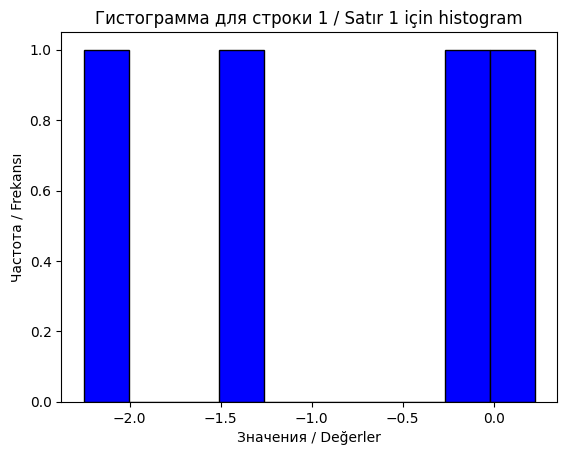

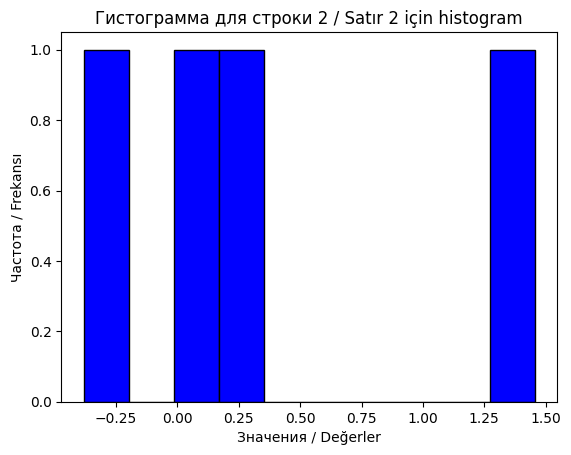

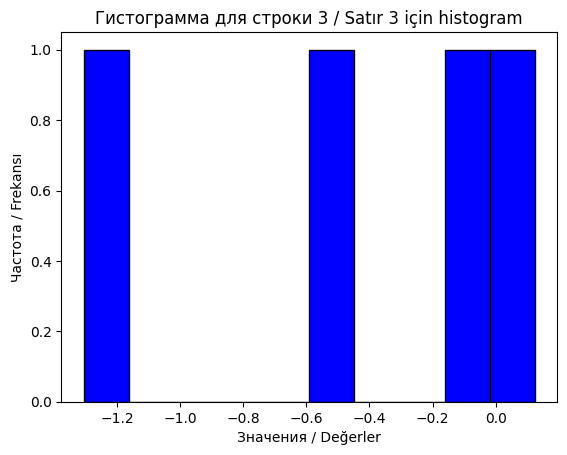

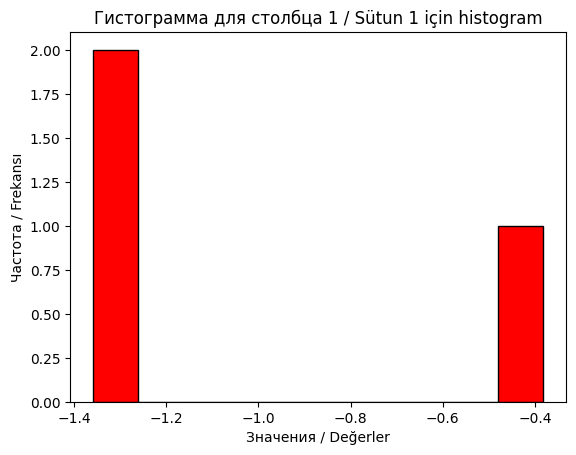

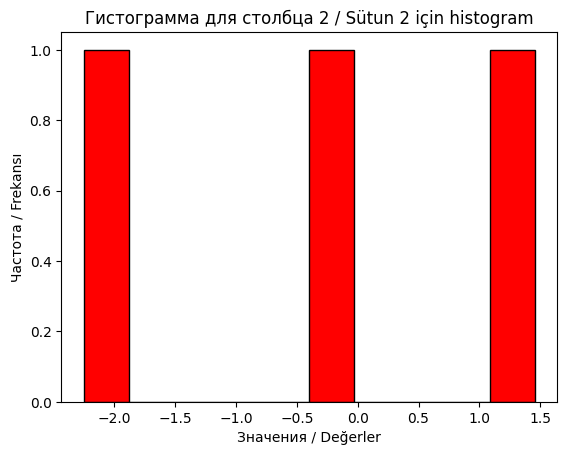

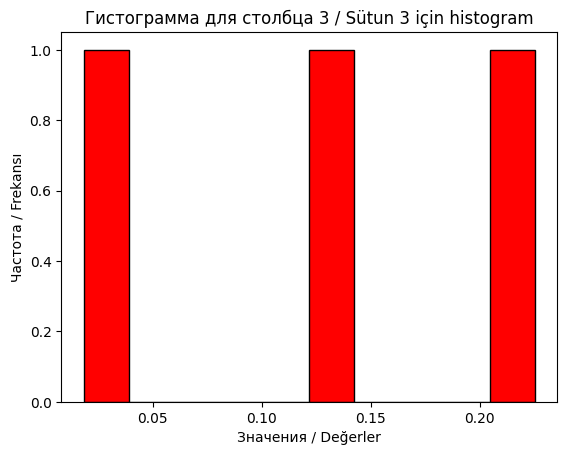

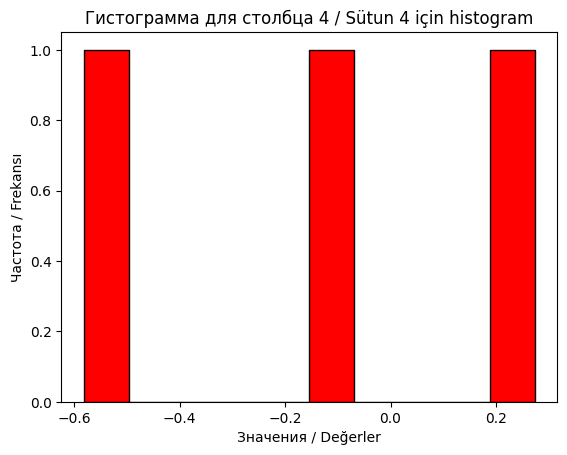

In [27]:
M, row_means, row_vars, col_means, col_vars = matrix_analyz(3, 4)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [28]:
def chess(m, n, a, b):
    M = np.zeros((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                M[i, j] = a
            else:
                M[i, j] = b
    return M

In [33]:
# Satranç düzeni testleri 
M = chess(3, 3, 5, 9)

# 1. Boyut doğru mu?
assert M.shape == (3, 3), " Boyut yanlış!"

# 2. a ve b değerleri doğru yerlerde mi?
for i in range(3):
    for j in range(3):
        if (i + j) % 2 == 0:
            assert M[i, j] == 5, f"Hata: ({i},{j}) konumunda {M[i,j]} yerine 5 olmalı"
        else:
            assert M[i, j] == 9, f"Hata: ({i},{j}) konumunda {M[i,j]} yerine 9 olmalı"

print(" успешно geçti!")

 успешно geçti!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(m, n, a, b, bg_color=(255,255,255), rect_color=(255,0,0)):
    '''
    (m, n): görüntü boyutu (yükseklik, genişlik)
    (a, b): dikdörtgen boyutları (yükseklik, genişlik)
    bg_color: arka plan rengi (RGB)
    rect_color: dikdörtgen rengi (RGB)
    '''
    # RGB görüntü oluştur
    img = np.ones((m, n, 3), dtype=np.uint8)
    img[:] = bg_color

    # merkez hesapla
    x0, y0 = n // 2, m // 2

    # dikdörtgen sınırlarını belirle
    x1, x2 = x0 - b // 2, x0 + b // 2
    y1, y2 = y0 - a // 2, y0 + a // 2

    # dikdörtgeni doldur
    img[y1:y2, x1:x2] = rect_color

    plt.imshow(img)
    plt.title("Dikdörtgen / Прямоугольник")
    plt.axis("off")
    plt.show()

    return img

def draw_ellipse(m, n, a, b, bg_color=(255,255,255), ellipse_color=(0,0,255)):
    '''
    (m, n): görüntü boyutu
    (a, b): elips yarı eksenleri
    bg_color: arka plan rengi (RGB)
    ellipse_color: elips rengi (RGB)
    '''
    y, x = np.ogrid[:m, :n]
    x0, y0 = n // 2, m // 2

    # RGB görüntü oluştur
    img = np.ones((m, n, 3), dtype=np.uint8)
    img[:] = bg_color

    # elips denklemi: ((x-x0)^2 / b^2) + ((y-y0)^2 / a^2) <= 1
    mask = ((x - x0)**2 / b**2 + (y - y0)**2 / a**2) <= 1
    img[mask] = ellipse_color

    plt.imshow(img)
    plt.title("Elips / Овал")
    plt.axis("off")
    plt.show()

    return img



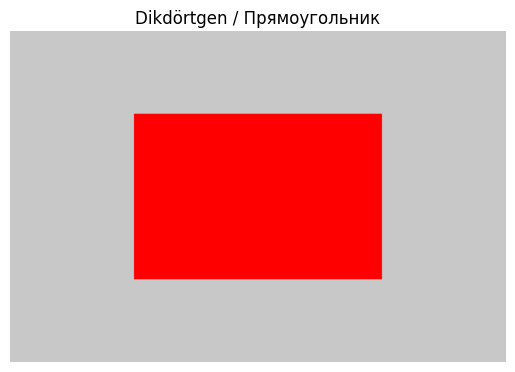

✅ Dikdörtgen fonksiyonu testten geçti.


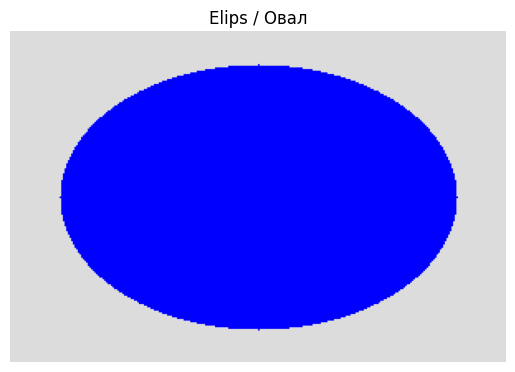

✅ Elips fonksiyonu testten geçti.


In [35]:
img_rect = draw_rectangle(200, 300, 100, 150, bg_color=(200,200,200), rect_color=(255,0,0))
assert img_rect.shape == (200, 300, 3)
assert (img_rect.dtype == np.uint8)
print("✅ Dikdörtgen fonksiyonu testten geçti.")

img_ellipse = draw_ellipse(200, 300, 80, 120, bg_color=(220,220,220), ellipse_color=(0,0,255))
assert img_ellipse.shape == (200, 300, 3)
assert (img_ellipse.dtype == np.uint8)
print("✅ Elips fonksiyonu testten geçti.")


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [36]:

def analyze_series(series, p=3):
  
    series = np.array(series, dtype=float)
    
    #
    mean_val = np.mean(series)
    var_val = np.var(series)
    std_val = np.std(series)

    local_maxima = []
    local_minima = []
    for i in range(1, len(series)-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append((i, series[i]))
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append((i, series[i]))

    
    moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')

    
    return {
        "mean": mean_val,
        "variance": var_val,
        "std": std_val,
        "local_maxima": local_maxima,
        "local_minima": local_minima,
        "moving_average": moving_avg
    }


In [41]:

series = [1, 3, 2, 5, 4, 6, 3, 2, 4, 5]

results = analyze_series(series, p=3)


print("Ort:", results["mean"])
print("Variance:", results["variance"])
print("Std deviation:", results["std"])
print("Local max:", results["local_maxima"])
print("Local min:", results["local_minima"])
print("Moving average:", results["moving_average"])


assert isinstance(results["mean"], float)
assert len(results["moving_average"]) == len(series) - 3 + 1
assert all(isinstance(x, tuple) for x in results["local_maxima"])
assert all(isinstance(x, tuple) for x in results["local_minima"])

print("ura")


Ort: 3.5
Variance: 2.25
Std deviation: 1.5
Local max: [(1, np.float64(3.0)), (3, np.float64(5.0)), (5, np.float64(6.0))]
Local min: [(2, np.float64(2.0)), (4, np.float64(4.0)), (7, np.float64(2.0))]
Moving average: [2.         3.33333333 3.66666667 5.         4.33333333 3.66666667
 3.         3.66666667]
ura


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [42]:

def one_hot_encode(labels):
   
    labels = np.array(labels, dtype=int)
    num_classes = np.max(labels) + 1  
    one_hot = np.zeros((len(labels), num_classes), dtype=int)
    
    for i, label in enumerate(labels):
        one_hot[i, label] = 1

    return one_hot


In [43]:

labels = [0, 2, 3, 0]
encoded = one_hot_encode(labels)
print(encoded)


[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
